In [8]:
from train.retrieve import get_results, get_paths, load_picks
import pickle
from datasets.defaults import get_def_ds

In [17]:
# Defining the dataset (This stores information for tuh and nmt, including the class weight balancing)
tuh, nmt, nmt_new = get_def_ds(mins=7)
current_selected= nmt

In [10]:
res = get_results(current_selected[3], clean=True)

In [11]:
res = res.drop(["train_accuracy", "train_precision", "train_recall", "train_f1score", "train_loss"], axis = 1)
res

,Model Name,Model Size,Model ID,Data ID,val_accuracy,val_precision,val_recall,val_f1score,val_loss,Best Val Accuracy,Best Val Loss
0,WaveScnet,394438,model_0,results0,0.8855,0.8621,0.9146,0.8876,0.4993,0.8916,0.4993


In [12]:
res.sort_values("Best Val Accuracy", ascending = False).iloc[:20]

,Model Name,Model Size,Model ID,Data ID,val_accuracy,val_precision,val_recall,val_f1score,val_loss,Best Val Accuracy,Best Val Loss
0,WaveScnet,394438,model_0,results0,0.8855,0.8621,0.9146,0.8876,0.4993,0.8916,0.4993


In [13]:
res.iloc[110:]

,Model Name,Model Size,Model ID,Data ID,val_accuracy,val_precision,val_recall,val_f1score,val_loss,Best Val Accuracy,Best Val Loss


In [18]:
res = get_results(current_selected[3], clean=False)
mod_info = res[res["Model ID"] == "model_0"]
mod_info

,Model Name,Model Size,Model ID,Data ID,hyperparamters des,model des,data des,history des,train_accuracy,train_precision,train_recall,train_f1score,train_loss,val_accuracy,val_precision,val_recall,val_f1score,val_loss,Best Val Accuracy,Best Val Loss
0,WaveScnet,394438,model_0,results0,/media/dll-1/SSD 4TB/EEG Datasets/athar arsala...,/media/dll-1/SSD 4TB/EEG Datasets/athar arsala...,/media/dll-1/SSD 4TB/EEG Datasets/athar arsala...,/media/dll-1/SSD 4TB/EEG Datasets/athar arsala...,0.867063,0.555556,0.889571,0.683962,0.312139,0.885542,0.862069,0.914634,0.887574,0.499319,0.891566,0.499319


In [19]:
h, m, d, hi = load_picks(res, "model_0")

In [ ]:
print(m["summary"])

SCNetWaveMFFMTrans(
  (mffm_block1): MFFMBlock(
    (conv1): Conv1d(50, 8, kernel_size=(5,), stride=(1,), padding=(2,))
    (bn1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv1d(58, 16, kernel_size=(5,), stride=(1,), padding=(2,))
    (bn2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (wave_block1): WaveBlock(
    (layers): ModuleList(
      (0): WaveLayer(
        (conv): Conv1d(74, 74, kernel_size=(3,), stride=(1,), padding=(2,))
        (tanh): Tanh()
        (sig): Sigmoid()
        (filter): Conv1d(74, 74, kernel_size=(1,), stride=(1,))
        (gate): Conv1d(74, 74, kernel_size=(1,), stride=(1,))
      )
      (1): WaveLayer(
        (conv): Conv1d(74, 74, kernel_size=(3,), stride=(1,), padding=(4,), dilation=(2,))
        (tanh): Tanh()
        (sig): Sigmoid()
        (filter): Conv1d(74, 74, kernel_size=(1,), stride=(1,))
        (gate): Conv1d(74, 74, kernel_size=(1,), stride=(1,))
 

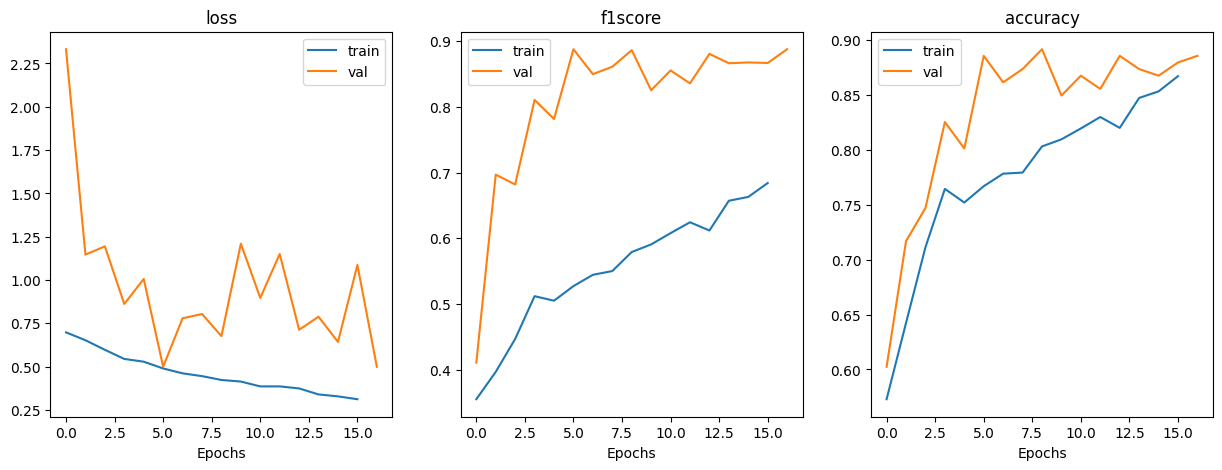

In [21]:
hi.plot()

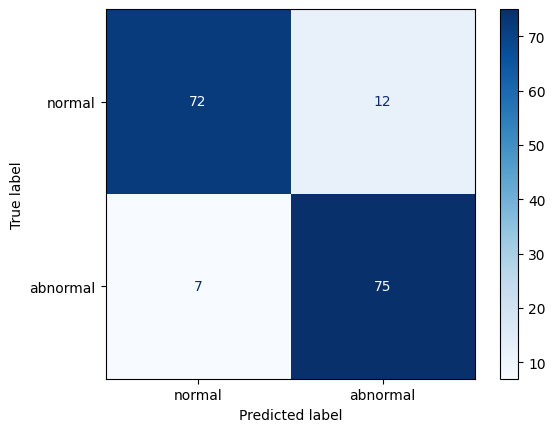

In [22]:
hi.display_cm()